In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Алгоритм k-means

Алгоритм k-means является одним из самых популярных методов кластеризации данных. Он используется для разбиения набора данных на \(k\) групп (кластеров) на основе схожести данных. Этот алгоритм особенно полезен в задачах, связанных с сегментацией, упрощением данных и анализом шаблонов.

## Основные шаги алгоритма k-means:

1. **Выбор количества кластеров $k$**:
   - На первом этапе необходимо задать количество кластеров $k$, на которое будет разделен набор данных. Этот параметр обычно выбирается экспериментально.

2. **Инициализация центроидов**:
   - Случайным образом выбираются $k$ точек из данных, которые станут начальными центроидами кластеров. Центроид — это точка, представляющая центр кластера.

3. **Назначение точек кластерам**:
   - Для каждой точки в наборе данных вычисляется расстояние до каждого из $k$ центроидов. Точка присваивается кластеру, центроид которого находится ближе всего к этой точке. В этом шаге обычно используется эвклидово расстояние, но могут применяться и другие метрики расстояния.

4. **Обновление центроидов**:
   - После назначения всех точек пересчитываются центроиды. Новый центроид каждого кластера вычисляется как среднее значение всех точек, принадлежащих этому кластеру.

5. **Повторение шагов 3 и 4**:
   - Шаги 3 и 4 повторяются до тех пор, пока центроиды не перестанут изменяться (или изменения будут незначительными) или пока не будет достигнуто максимальное количество итераций. Это означает, что алгоритм сошелся и кластеры стабилизировались.


## Заключение

Алгоритм k-means является мощным инструментом для кластеризации данных, который используется в различных областях, таких как маркетинг, биоинформатика, обработка изображений и многие другие. Несмотря на свои ограничения, он остается одним из основных методов для решения задач кластеризации.

# Что оптимизирует k_means:

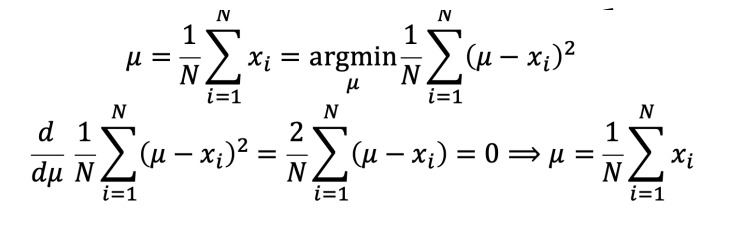

# Task

Напишите алгоритм кластеризации данных для предложенной выборки с тремя кластерами.

In [5]:
coords = np.concatenate([np.random.randn(100, 2)+np.array([1, 2]),
                         np.random.randn(100, 2)+np.array([-5, 4]),
                         np.random.randn(150, 2)+np.array([3, -5])], axis=0)

<Axes: >

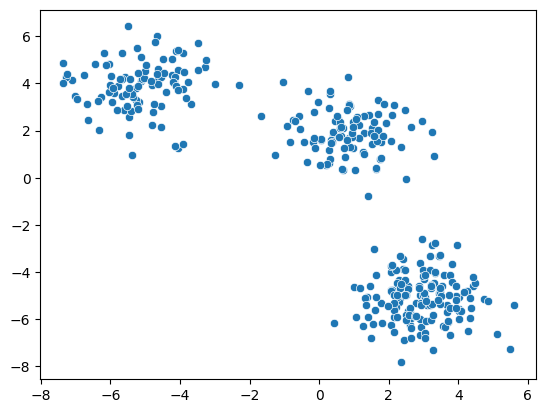

In [6]:
sns.scatterplot(x=coords[:, 0], y=coords[:, 1])

Координаты центроидов: [[ 1.11083985  2.05017524]
 [-4.81217113  4.0049688 ]
 [ 2.92983014 -4.92045199]]
Метки кластеров: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


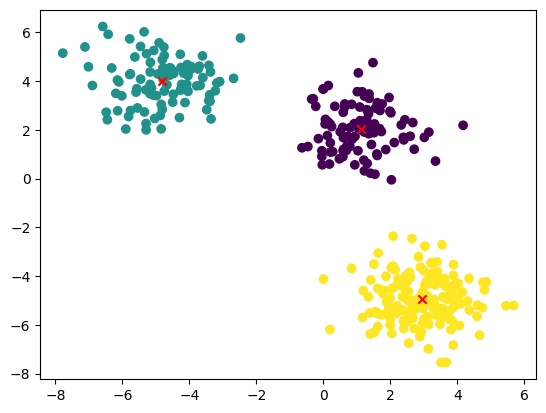

In [7]:
def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [np.linalg.norm(x - c) for c in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        new_centroid = cluster_points.mean(axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

def kmeans(X, k, max_iter=100):
    np.random.seed(0)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iter):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, clusters

if __name__ == "__main__":
    import matplotlib.pyplot as plt

    coords = np.concatenate([np.random.randn(100, 2)+np.array([1, 2]),
                             np.random.randn(100, 2)+np.array([-5, 4]),
                             np.random.randn(150, 2)+np.array([3, -5])], axis=0)

    k = 3

    centroids, labels = kmeans(coords, k)

    print("Координаты центроидов:", centroids)
    print("Метки кластеров:", labels)

    plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.show()


In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(coords)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


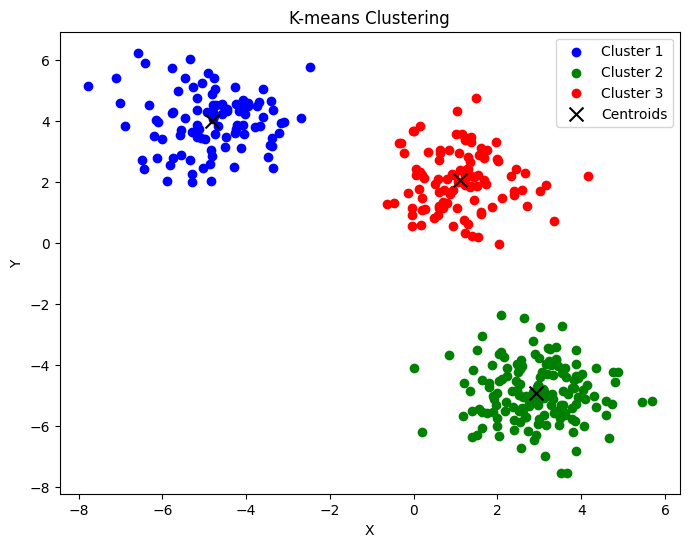

In [10]:

cluster1 = coords[labels == 0]
cluster2 = coords[labels == 1]
cluster3 = coords[labels == 2]

plt.figure(figsize=(8, 6))
plt.scatter(cluster1[:, 0], cluster1[:, 1], color='blue', label='Cluster 1')
plt.scatter(cluster2[:, 0], cluster2[:, 1], color='green', label='Cluster 2')
plt.scatter(cluster3[:, 0], cluster3[:, 1], color='red', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
